# Write Minimal Evals

Level 1: Assertions -- these are my unit tests.  

- No language model as a judge yet!
- Instant feedback.
- You can use a LLM to help you brainstorm and write these (next module w/Shreya)

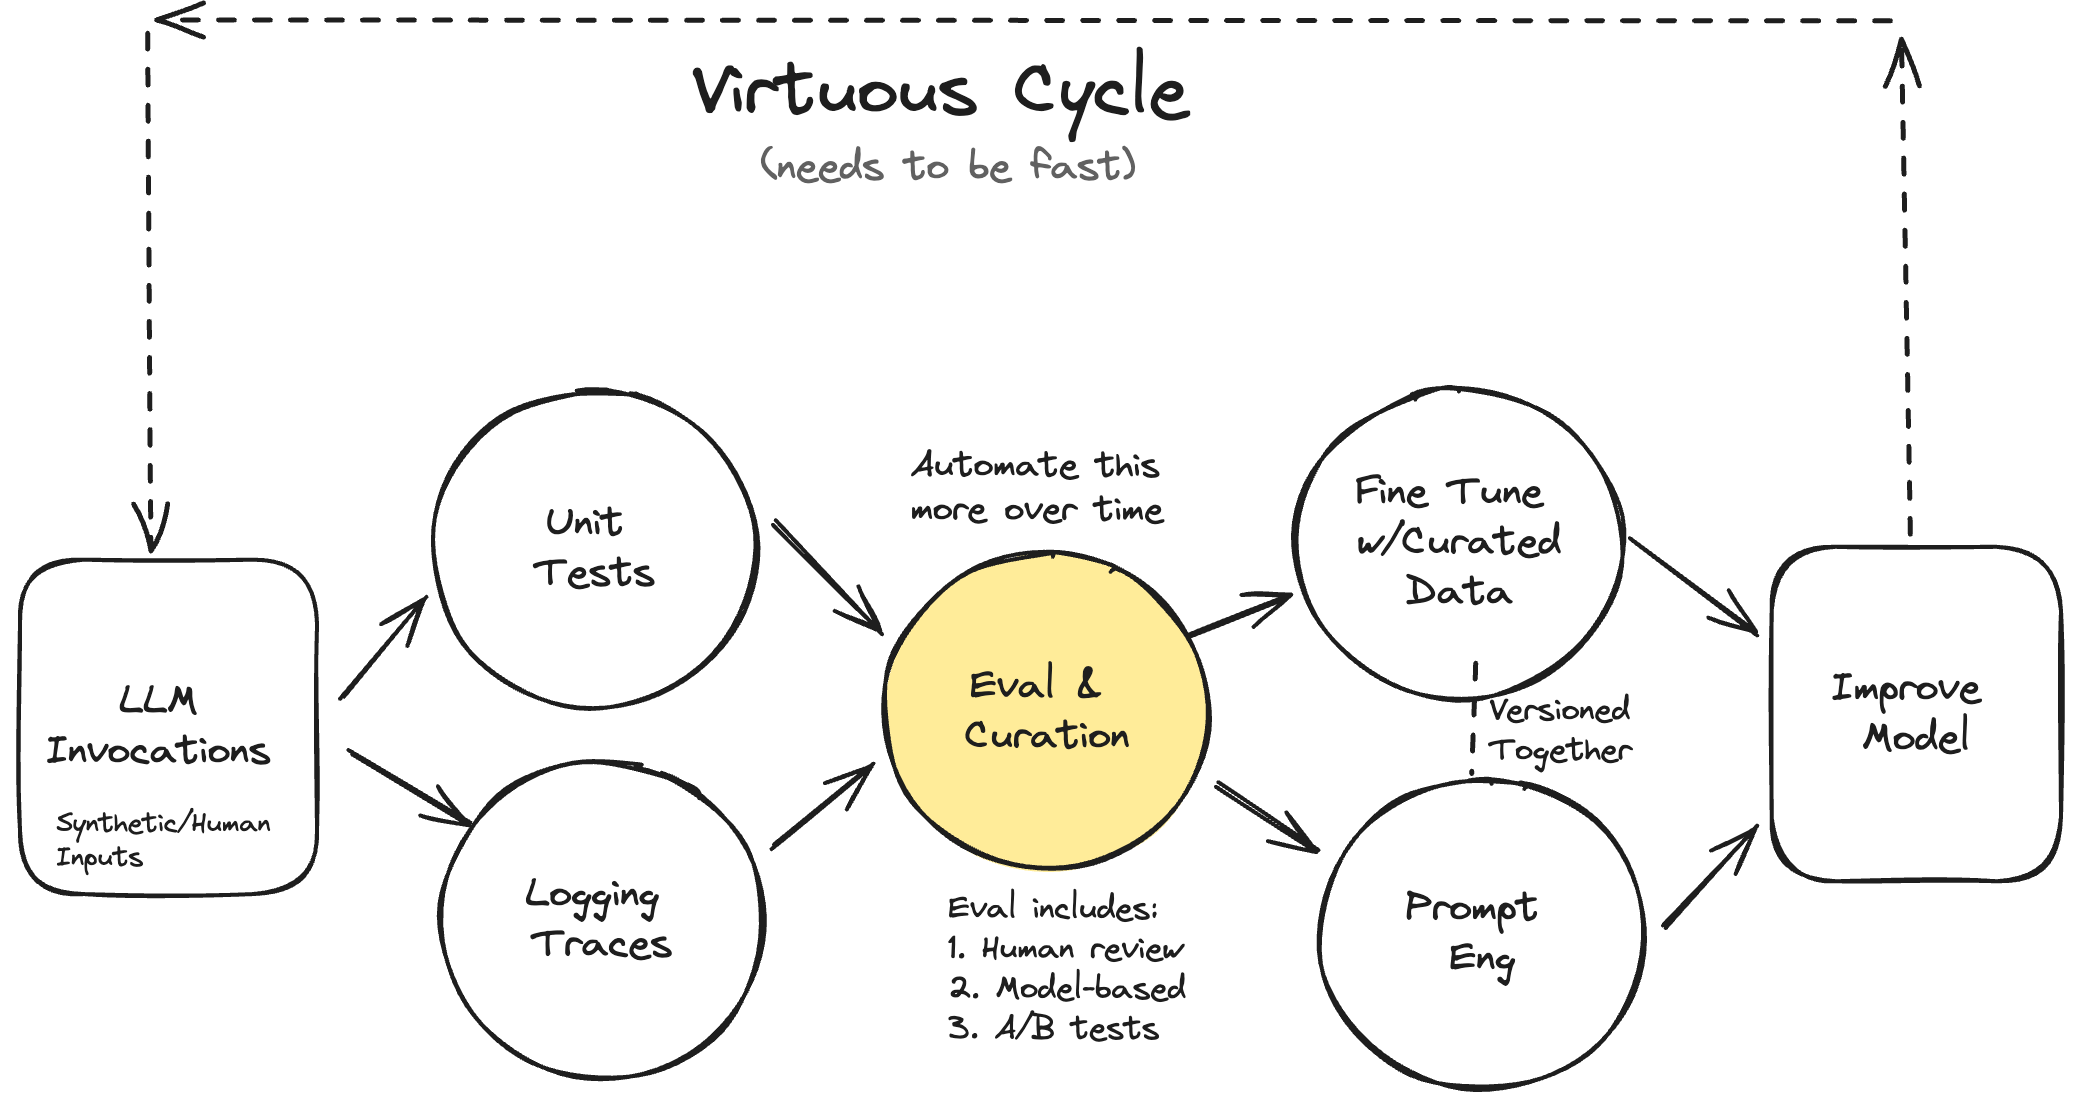

## Test Scenarios

In [3]:
%pycat tests/test_validation.py

import sys, os, pytest
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '../src/')))
from validate import check_query, InvalidQueryException

def test_check_query_valid():
    query_spec = '{"calculations":[{"column":"duration_ms","op":"MAX"}]}'
    columns = ["duration_ms"]
    assert check_query(query_spec, columns) is None

def test_check_query_invalid_json():
    query_spec = 'invalid json'
    columns = ["duration_ms"]
    with pytest.raises(InvalidQueryException) as exc_info:
        check_query(query_spec, columns)
    assert "JSON parsing error" in str(exc_info.value)

def test_check_query_invalid_calculation_op():
    query_spec = '{"calculations":[{"column":"duration_ms","op":"INVALID_OP"}]}'
    columns = ["duration_ms"]
    with pytest.raises(InvalidQueryException) as exc_info:
        check_query(query_spec, columns)
    assert "Invalid calculation" in str(exc_info.value)

def test_check_query_invalid_column():
    query_spec = '{"calculations":[{

## My testing logic

- You don't have to understand this.  `check_query`
- I had to iterate on this for a while until I caught all edge cases.  But this was probably the most critical and impactful work!  
- Many people skip this.  You won't and you'll have a massive advantage.

**--> YOUR JOB IS TO CLEAN AND LOOK AT DATA <--**

In [5]:
%pycat utils/validate.py

import json
import math
import pandas as pd

class InvalidQueryException(Exception):
    def __init__(self, message, query=None):
        self.message = message
        self.query = query
        if query:
            self.message += f"\nQuery: {self.query}"
        super().__init__(self.message)


def is_valid(query_spec:str, columns:str, check_runnable=True):
    "Test if a query is valid"
    try:
        check_query(query_spec, columns, check_runnable)
        return True
    except InvalidQueryException:
        return False

def check_query(query_spec:str, columns:str, check_runnable=True):
    "Raise an exception if a query is invalid."
    query_spec = query_spec.replace("'", '"')
    try:
        spec = json.loads(query_spec)
    except json.decoder.JSONDecodeError:
        raise InvalidQueryException(f"JSON parsing error:\n{query_spec}", query_spec)

    valid_calculate_ops = [
        "COUNT",
        "COUNT_DISTINCT",
        "HEATMAP",
        "CONCURRENCY",
        "SUM",

## Assertions Are Not Just For Tests

1. Tests
2. Filtering and Curating data
3. Inference time to automatically "heal" data

## More Examples

See [https://hamel.dev/blog/posts/evals/](https://hamel.dev/blog/posts/evals/)